In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [45]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [46]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [48]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
train_df.info()
train_df['Age'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [51]:
train_df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


### Ảnh hưởng của các thuộc tính đến việc sống /chết của các thành viên

<Axes: xlabel='Sex', ylabel='count'>

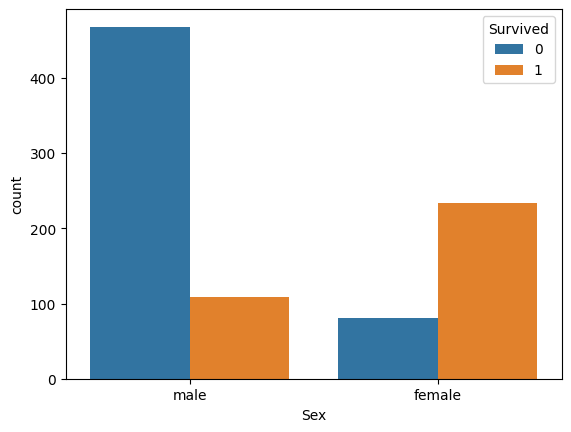

In [52]:
sns.countplot(data = train_df, x = 'Sex', hue= 'Survived')

<Axes: xlabel='Pclass', ylabel='count'>

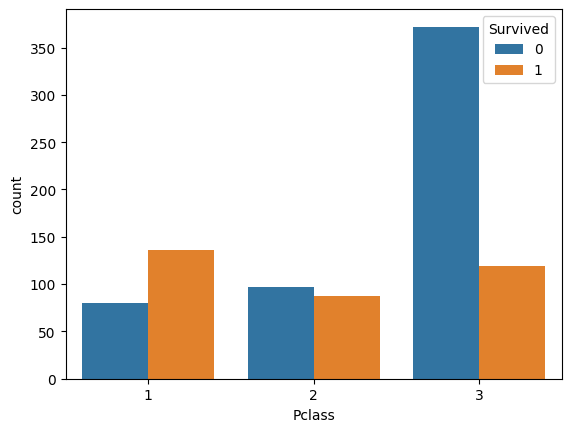

In [53]:
sns.countplot(data = train_df, x = 'Pclass', hue= 'Survived')
## Pclass : hạng vé (1: hạng cao nhất, 3: hạng thấp nhất)

<Axes: xlabel='Fare', ylabel='count'>

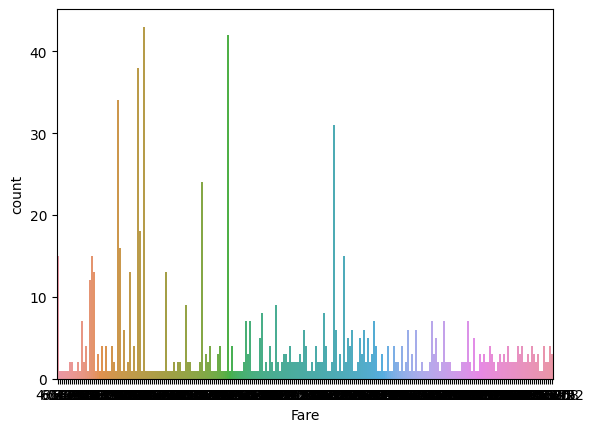

In [54]:
sns.countplot(data = train_df,x = 'Fare')
## Fare : giá vé

In [55]:
fare_categories = ['Economic','Standard','Expensice','Priority']
qt_data = pd.qcut(train_df['Fare'],4,labels =fare_categories)
pd.qcut(test_df['Fare'],4,labels =fare_categories)
qt_data = pd.DataFrame(qt_data)
qt_data['Survived'] = train_df['Survived']
sns.countplot(qt_data,hue = 'Survived')

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'Survived'

In [ ]:
qt_data

In [56]:
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [57]:
test_df['Family_size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

<Axes: xlabel='Family_size', ylabel='count'>

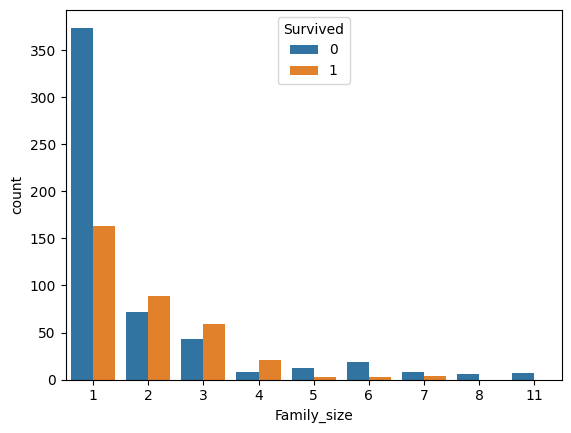

In [58]:
sns.countplot(data = train_df,x = 'Family_size', hue = 'Survived')

In [59]:
## chia size gia đình theo đoạn mong muốn

In [60]:
train_df["Family_Cat"] = pd.cut(train_df["Family_size"], bins = [0,1,4,6,20], labels = ['Single','Small','Medium','Large'])

In [61]:
test_df["Family_Cat"] = pd.cut(test_df["Family_size"], bins = [0,1,4,6,20], labels = ['Single','Small','Medium','Large'])

<Axes: xlabel='Family_Cat', ylabel='count'>

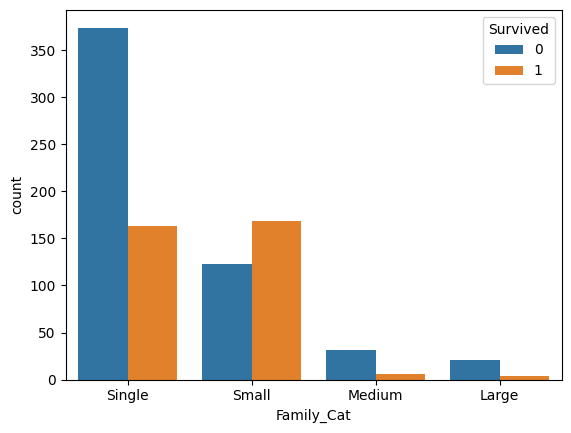

In [62]:
sns.countplot(data = train_df, x = 'Family_Cat', hue = 'Survived')

In [63]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Single


In [64]:
num_features = ['Age','Fare']
cat_features = ['Sex','Pclass','Embarked','Family_Cat']
feature_cols = num_features + cat_features
feature_cols

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Family_Cat']

In [65]:
X = train_df[feature_cols]

In [66]:
X.tail()

,Age,Fare,Sex,Pclass,Embarked,Family_Cat
886,27.0,13.00,male,2,S,Single
887,19.0,30.00,female,1,S,Single
888,NaN,23.45,female,3,S,Small
889,26.0,30.00,male,1,C,Single
890,32.0,7.75,male,3,Q,Single


In [67]:
y = train_df['Survived']

In [68]:
y.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [69]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
num_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')), 
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

# 'imputer': điền giá trị còn thiếu
# 'most_frequent': thuộc tính phổ biến nhất

### Chuẩn hóa dữ liệu

In [70]:
preprocessor = ColumnTransformer(transformers = [
    ('num',num_transformer, num_features),
    ('cat',cat_transformer, cat_features)
])

In [71]:
X = preprocessor.fit_transform(X)
X_test = test_df[feature_cols]

In [72]:
X_test = preprocessor.transform(X_test)

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2)

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7,random_state = 7)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=7)

In [79]:
decision_tree.score(X_val,y_val)

0.8324022346368715